In [3]:
%matplotlib inline

from modsim import *

from pandas import read_csv

filename = 'india_2.csv'
table = read_csv(filename, header=0, index_col=0, decimal='M')



In [4]:
system = System(alpha = 0.025, beta = -0.00185, plus = 449480608, delta = 0)

In [5]:
table.columns = ['avg_pop']

In [58]:
def plotting(x_1, x_2):
    newfig()
    
    plot(x_1, ':', color='darkblue', label='Simulation')
    plot(x_2, '-', color='red', label='Data')
    decorate(xlabel='Year',
    ylabel='World Population (Billions)')

In [59]:
first_year = table.avg_pop.index[0]
last_year = table.avg_pop.index[-1]

avg_pop = table.avg_pop / 1e9 # in Billion

first_year

1960

In [60]:
avg_pop[1960]

0.449480608

In [61]:

def slope(recent_year = 2016, past_year = 1960):
    
    
    pop_difference = avg_pop[recent_year] - avg_pop[past_year]
    elapsed_time = recent_year - past_year
    annual_growth = pop_difference / elapsed_time
    
    return annual_growth
    print('Annual Growth:', annual_growth)
    
    
annual_growth = slope()
annual_growth

0.015619477607142856

In [69]:
def simulating_pop_linear(starting_year = 1960, ending_year = 2030):
    
    results = TimeSeries()
    results[starting_year] = avg_pop[starting_year]
    
    for t in linrange(starting_year, ending_year):
        results[t + 1] = results[t] + annual_growth
        
    print (results)
    return results

    
calculated_pop_linear = simulating_pop_linear()

1960    0.449481
1961    0.465100
1962    0.480720
1963    0.496339
1964    0.511959
1965    0.527578
1966    0.543197
1967    0.558817
1968    0.574436
1969    0.590056
1970    0.605675
1971    0.621295
1972    0.636914
1973    0.652534
1974    0.668153
1975    0.683773
1976    0.699392
1977    0.715012
1978    0.730631
1979    0.746251
1980    0.761870
1981    0.777490
1982    0.793109
1983    0.808729
1984    0.824348
1985    0.839968
1986    0.855587
1987    0.871207
1988    0.886826
1989    0.902445
          ...   
2002    1.105499
2003    1.121118
2004    1.136738
2005    1.152357
2006    1.167977
2007    1.183596
2008    1.199216
2009    1.214835
2010    1.230454
2011    1.246074
2012    1.261693
2013    1.277313
2014    1.292932
2015    1.308552
2016    1.324171
2017    1.339791
2018    1.355410
2019    1.371030
2020    1.386649
2021    1.402269
2022    1.417888
2023    1.433508
2024    1.449127
2025    1.464747
2026    1.480366
2027    1.495986
2028    1.511605
2029    1.5272

In [78]:
system = System(alpha = 0.0295, beta = -0.0119)

def simulating_pop_quadratic(starting_year = 1960, ending_year = 2200):
    
    results = TimeSeries()
    results[starting_year] = avg_pop[starting_year]
    
    for t in linrange(starting_year, ending_year):
        results[t + 1] = results[t] + system.alpha * results[t] + system.beta * results[t]**2
        
    print (results)
    return results
    
    

calculated_pop_quadratic = simulating_pop_quadratic()



1960    0.449481
1961    0.460336
1962    0.471394
1963    0.482656
1964    0.494122
1965    0.505793
1966    0.517670
1967    0.529752
1968    0.542040
1969    0.554534
1970    0.567234
1971    0.580138
1972    0.593247
1973    0.606560
1974    0.620075
1975    0.633792
1976    0.647709
1977    0.661824
1978    0.676135
1979    0.690641
1980    0.705339
1981    0.720226
1982    0.735300
1983    0.750557
1984    0.765995
1985    0.781609
1986    0.797397
1987    0.813354
1988    0.829475
1989    0.845757
          ...   
2172    2.458543
2173    2.459141
2174    2.459722
2175    2.460286
2176    2.460834
2177    2.461365
2178    2.461882
2179    2.462383
2180    2.462870
2181    2.463342
2182    2.463801
2183    2.464246
2184    2.464679
2185    2.465098
2186    2.465506
2187    2.465902
2188    2.466286
2189    2.466659
2190    2.467021
2191    2.467372
2192    2.467713
2193    2.468044
2194    2.468366
2195    2.468678
2196    2.468981
2197    2.469275
2198    2.469561
2199    2.4698

Saving figure to file Population_Estimate_1_logistic.pdf


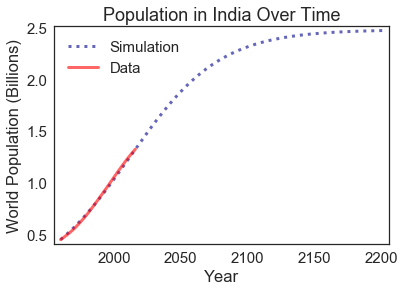

In [79]:
#QUADRATIC PLOTTING
plotting(calculated_pop_quadratic, avg_pop)
decorate(title='Population in India Over Time')
savefig('Population_Estimate_1_logistic.pdf')

Saving figure to file Population_Estimate_1_linear.pdf


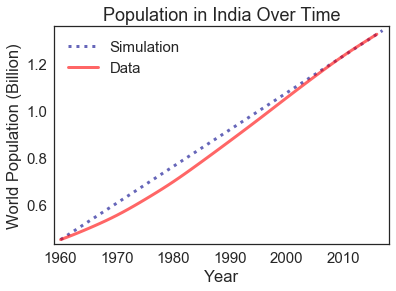

In [14]:
#LINEAR PLOTTING
plotting(calculated_pop_linear, avg_pop)
decorate(title='Population in India Over Time')
savefig('Population_Estimate_1_linear.pdf')

In [15]:
def simulate_until_pop(pop_limit = 1500000):
    
    results = TimeSeries()
    results[first_year] = avg_pop[first_year]
    
    
